In [1]:
import os
import protein_geometry as pg
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable

ddir = '/home/wlg/development/HMS/eqnetworks/data'

In [2]:
sets = defaultdict(lambda: np.NaN)  # (lwr, upr) -> n
lwr = set()
upr = set()
for f in os.listdir(ddir):
    if '_' not in f:
        continue
    bounds = tuple([float(d) for d in f.split('_')])
    lwr.add(bounds[0])
    upr.add(bounds[1])
    with open(os.path.join(ddir, f, 'labels.csv'), 'r') as  file:
        sets[bounds] = len(file.readlines()) - 2
lwr = sorted(lwr)
upr = sorted(upr)
print(lwr)
print(upr)

[0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0, 260.0, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0]
[500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0]


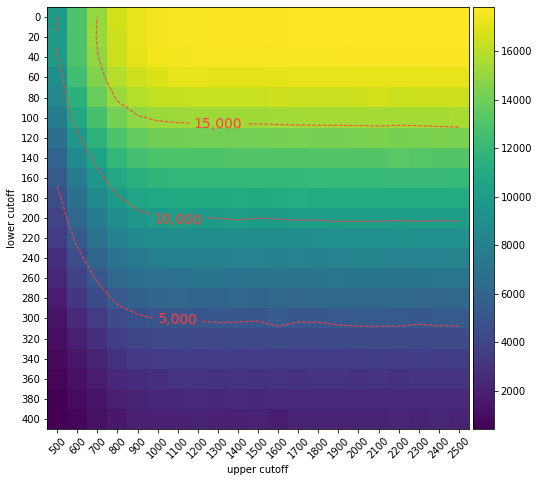

In [35]:
mat = np.empty((len(lwr), len(upr)))
mat[:] = np.NaN
for i, l in enumerate(lwr):
    for j, u in enumerate(upr):
        mat[i, j] = sets[(l, u)]
plt.gcf().set_size_inches(8, 8)
ax = plt.gca()
im = plt.imshow(mat)
ax.set(
    xticks=range(len(upr)),
    yticks=range(len(lwr)),
    xlabel='upper cutoff',
    ylabel='lower cutoff',
)
ax.set_xticklabels([f'{int(l)}' for l in upr], rotation=45)
ax.set_yticklabels([f'{int(l)}' for l in lwr])

CS = ax.contour(mat, levels=[5000, 10000, 15000], colors=(1, 0.25, 0.25), linewidths=1, linestyles='dashed')
ax.clabel(CS, inline=True, fontsize=14, fmt=lambda l: f'{int(l):,}')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.gcf().savefig(os.path.join(os.path.dirname(ddir), 'dataset_counts.png'))